In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O

In [2]:
import pandas as pd
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import os
import warnings
import seaborn as sns

In [4]:
from sklearn.preprocessing import OneHotEncoder 
from sklearn.datasets import make_blobs
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

In [5]:
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import SGDClassifier
import plotly.offline as py
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
from sklearn.model_selection import train_test_split

In [6]:
house_loan=pd.read_csv('loan_data.csv') 

In [7]:
house_loan.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
house_loan.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,23282.000000,23282.000000,23282.000000,2.328200e+04,2.328200e+04,23282.000000,2.326400e+04,23282.000000,23282.000000,23282.000000,...,23281.000000,23281.000000,23281.000000,23281.000000,20168.000000,20168.000000,20168.000000,20168.000000,20168.000000,20168.000000
mean,113570.719440,0.079804,0.416373,1.733403e+05,6.002050e+05,27134.236535,5.395397e+05,0.020731,-16010.774805,62798.682459,...,0.007818,0.000644,0.000558,0.000515,0.007388,0.007586,0.032576,0.275932,0.263288,1.888388
std,7830.755945,0.270996,0.719606,7.720617e+05,4.022264e+05,14607.498468,3.698661e+05,0.013776,4351.106672,140445.941033,...,0.088072,0.025375,0.023624,0.022698,0.087357,0.113509,0.196866,0.955535,0.613881,1.864287
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,2052.000000,4.500000e+04,0.000533,-25182.000000,-16365.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,106808.250000,0.000000,0.000000,1.125000e+05,2.700000e+05,16456.500000,2.385000e+05,0.010006,-19618.750000,-2789.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,113562.500000,0.000000,0.000000,1.464750e+05,5.160690e+05,24986.250000,4.500000e+05,0.018850,-15748.500000,-1232.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,120362.750000,0.000000,1.000000,2.025000e+05,8.100000e+05,34720.875000,6.795000e+05,0.028663,-12361.000000,-294.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,127085.000000,1.000000,8.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7680.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,2.000000,5.000000,5.000000,24.000000,8.000000,25.000000


In [10]:
house_loan.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

In [11]:
house_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23282 entries, 0 to 23281
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(100), int64(6), object(16)
memory usage: 21.7+ MB


In [13]:
house_loan.isnull().sum()

SK_ID_CURR                       0
TARGET                           0
NAME_CONTRACT_TYPE               0
CODE_GENDER                      0
FLAG_OWN_CAR                     0
                              ... 
AMT_REQ_CREDIT_BUREAU_DAY     3114
AMT_REQ_CREDIT_BUREAU_WEEK    3114
AMT_REQ_CREDIT_BUREAU_MON     3114
AMT_REQ_CREDIT_BUREAU_QRT     3114
AMT_REQ_CREDIT_BUREAU_YEAR    3114
Length: 122, dtype: int64

In [14]:
defaulters=(house_loan.TARGET==1).sum()
payers=(house_loan.TARGET==0).sum()
print((defaulters/payers)*100)

8.672516803584765


In [15]:
without_id=[column for column in house_loan.columns if column!='SK_ID_CURR'] 

#check for duplicate values
na=house_loan[house_loan.duplicated(subset=without_id,keep=False)] 
print("Duplicates are: ",na.shape[0])

Duplicates are:  0


<AxesSubplot:ylabel='TARGET'>

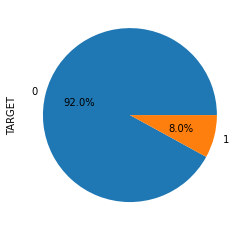

In [16]:
house_loan.TARGET.value_counts().plot(kind='pie',autopct='%1.1f%%')

In [17]:
import matplotlib as plt

<AxesSubplot:ylabel='TARGET'>

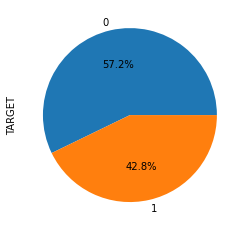

In [18]:
shuffled_data=house_loan.sample(frac=1,random_state=3)
unpaid_home_loan=shuffled_data.loc[shuffled_data['TARGET']==1] 
paid_home_loan=shuffled_data.loc[shuffled_data['TARGET']==0].sample(n=2482,random_state=69)
normalised_home_loan=pd.concat([unpaid_home_loan,paid_home_loan])
normalised_home_loan.TARGET.value_counts().plot(kind='pie',autopct="%1.1f%%")

In [19]:
import tensorflow as tf

In [20]:
normalised_home_loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4340 entries, 15136 to 3579
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(100), int64(6), object(16)
memory usage: 4.1+ MB


In [21]:
normalised_home_loan.head

<bound method NDFrame.head of        SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
15136      117678       1    Revolving loans           F            N   
3422       103996       1         Cash loans           M            Y   
17567      120489       1         Cash loans           M            Y   
5764       106741       1         Cash loans           M            N   
5577       106530       1         Cash loans           F            N   
...           ...     ...                ...         ...          ...   
6137       107172       0    Revolving loans           M            N   
18615      121710       0         Cash loans           F            N   
7154       108325       0         Cash loans           F            N   
6823       107956       0         Cash loans           F            N   
3579       104182       0         Cash loans           F            N   

      FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
15136               Y   

In [22]:
normalised_home_loan.dropna(axis=0)
normalised_home_loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4340 entries, 15136 to 3579
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(100), int64(6), object(16)
memory usage: 4.1+ MB


In [23]:
normalised_home_loan.isnull().sum()

SK_ID_CURR                      0
TARGET                          0
NAME_CONTRACT_TYPE              0
CODE_GENDER                     0
FLAG_OWN_CAR                    0
                             ... 
AMT_REQ_CREDIT_BUREAU_DAY     658
AMT_REQ_CREDIT_BUREAU_WEEK    658
AMT_REQ_CREDIT_BUREAU_MON     658
AMT_REQ_CREDIT_BUREAU_QRT     658
AMT_REQ_CREDIT_BUREAU_YEAR    658
Length: 122, dtype: int64

In [24]:
#print(normalised_home_loan.apply())

In [25]:
print(pd.unique(normalised_home_loan.AMT_REQ_CREDIT_BUREAU_DAY)) 
print(pd.unique(normalised_home_loan.AMT_REQ_CREDIT_BUREAU_WEEK))
print(pd.unique(normalised_home_loan.AMT_REQ_CREDIT_BUREAU_MON))
print(pd.unique(normalised_home_loan.AMT_REQ_CREDIT_BUREAU_QRT))
print(pd.unique(normalised_home_loan.AMT_REQ_CREDIT_BUREAU_YEAR))

[ 0. nan  1.  2.  5.]
[ 0. nan  1.  2.  5.]
[ 0. nan  1.  2.  7.  5.  3.  6.  4.  9. 10.  8. 13. 16. 12.]
[ 0.  2.  1. nan  3.  4.  6.  5.]
[ 3.  1.  5. nan  0.  4.  2.  9.  6.  7.  8. 11. 16. 10.]


In [26]:
normalised_home_loan.dropna(axis=0)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
4448,105200,1,Cash loans,M,Y,N,2,157500.0,732834.0,46962.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,4.0
11552,113461,1,Cash loans,F,Y,N,0,202500.0,502497.0,36562.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0
21432,124969,1,Cash loans,F,Y,Y,1,202500.0,450000.0,32742.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17128,119978,1,Cash loans,F,Y,Y,1,135000.0,550980.0,33835.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0
7064,108227,1,Cash loans,F,Y,N,2,126000.0,432661.5,22653.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15436,118014,0,Cash loans,F,Y,Y,0,360000.0,473760.0,51021.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18326,121377,0,Cash loans,M,Y,Y,0,270000.0,900000.0,29034.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0
3378,103946,0,Cash loans,M,Y,Y,0,166500.0,888840.0,32053.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19438,122670,0,Cash loans,M,Y,N,0,270000.0,785398.5,30042.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
print(normalised_home_loan.info())
print(normalised_home_loan.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4340 entries, 15136 to 3579
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(100), int64(6), object(16)
memory usage: 4.1+ MB
None
SK_ID_CURR                      0
TARGET                          0
NAME_CONTRACT_TYPE              0
CODE_GENDER                     0
FLAG_OWN_CAR                    0
                             ... 
AMT_REQ_CREDIT_BUREAU_DAY     658
AMT_REQ_CREDIT_BUREAU_WEEK    658
AMT_REQ_CREDIT_BUREAU_MON     658
AMT_REQ_CREDIT_BUREAU_QRT     658
AMT_REQ_CREDIT_BUREAU_YEAR    658
Length: 122, dtype: int64


<AxesSubplot:ylabel='TARGET'>

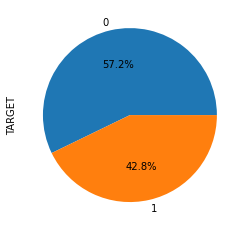

In [28]:
normalised_home_loan.TARGET.value_counts().plot(kind='pie',autopct="%1.1f%%")

<AxesSubplot:ylabel='NAME_CONTRACT_TYPE'>

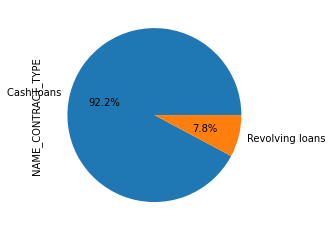

In [29]:
normalised_home_loan.NAME_CONTRACT_TYPE.value_counts().plot(kind='pie',autopct="%1.1f%%") 
#high amount of cash loans

<AxesSubplot:ylabel='CODE_GENDER'>

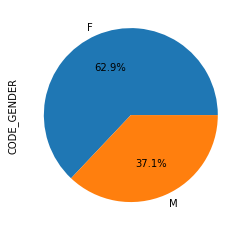

In [30]:
normalised_home_loan.CODE_GENDER.value_counts().plot(kind='pie',autopct="%1.1f%%") 
#roughly equal amount

<AxesSubplot:ylabel='FLAG_OWN_CAR'>

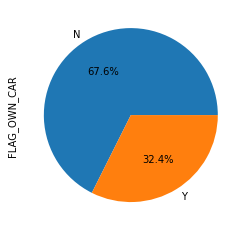

In [31]:
normalised_home_loan.FLAG_OWN_CAR.value_counts().plot(kind='pie',autopct="%1.1f%%")

<AxesSubplot:ylabel='CNT_CHILDREN'>

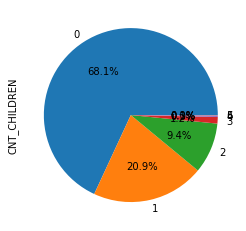

In [32]:
normalised_home_loan.CNT_CHILDREN.value_counts().plot(kind='pie',autopct="%1.1f%%")

In [35]:
pip install lightgbm

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 2.0 MB 8.8 MB/s eta 0:00:01
You should consider upgrading via the '/usr/local/bin/python3.7 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [36]:
init_notebook_mode(connected=True)
import cufflinks as cf
cf.go_offline()
import pickle
import gc
import lightgbm as lgb
warnings.filterwarnings('ignore')
%matplotlib inline

In [38]:
#!pip install chart_studio


cf.set_config_file(theme='polar')

normalised_home_loan[normalised_home_loan['AMT_INCOME_TOTAL'] < 2000000]['AMT_INCOME_TOTAL'].iplot(kind='histogram', bins=100,
   xTitle = 'Total Income', yTitle ='Count of applicants',
             title='Distribution of AMT_INCOME_TOTAL')

In [39]:
(normalised_home_loan[normalised_home_loan['AMT_INCOME_TOTAL']>1000000]['TARGET'].value_counts())/len(normalised_home_loan[normalised_home_loan['AMT_INCOME_TOTAL'] > 1000000])*100

0    66.666667
1    33.333333
Name: TARGET, dtype: float64

In [40]:
#print((normalised_home_loan[normalised_home_loan['CNT_CHILDREN']>1]['TARGET'].value_counts())/len(normalised_home_loan[normalised_home_loan['CNT_CHILDREN'] > 2])*100)
print((normalised_home_loan[normalised_home_loan['CNT_CHILDREN']>2]['TARGET'].value_counts())/len(normalised_home_loan[normalised_home_loan['CNT_CHILDREN'] > 2])*100)
print((normalised_home_loan[normalised_home_loan['CNT_CHILDREN']>5]['TARGET'].value_counts())/len(normalised_home_loan[normalised_home_loan['CNT_CHILDREN'] > 5])*100) 
#as number of children is increasing lone defaulters are increasing

1    55.882353
0    44.117647
Name: TARGET, dtype: float64
0    100.0
Name: TARGET, dtype: float64


In [41]:
print((normalised_home_loan[normalised_home_loan['FLAG_OWN_CAR']=='N']['TARGET'].value_counts())/len(normalised_home_loan[normalised_home_loan['FLAG_OWN_CAR'] =='N'])*100)
print((normalised_home_loan[normalised_home_loan['FLAG_OWN_CAR']=='Y']['TARGET'].value_counts())/len(normalised_home_loan[normalised_home_loan['FLAG_OWN_CAR'] =='Y'])*100) 

#people with own cars are slighlty more likely to repay back the loan 

0    56.646217
1    43.353783
Name: TARGET, dtype: float64
0    58.321479
1    41.678521
Name: TARGET, dtype: float64


In [42]:
print((normalised_home_loan[normalised_home_loan['CODE_GENDER']=='M']['TARGET'].value_counts())/len(normalised_home_loan[normalised_home_loan['CODE_GENDER'] =='M'])*100) 
print((normalised_home_loan[normalised_home_loan['CODE_GENDER']=='F']['TARGET'].value_counts())/len(normalised_home_loan[normalised_home_loan['CODE_GENDER'] =='F'])*100) 

#men more likely to default in payment of loans

0    50.124378
1    49.875622
Name: TARGET, dtype: float64
0    61.346999
1    38.653001
Name: TARGET, dtype: float64


In [43]:
print((normalised_home_loan[normalised_home_loan['NAME_CONTRACT_TYPE']=='Cash loans']['TARGET'].value_counts())/len(normalised_home_loan[normalised_home_loan['NAME_CONTRACT_TYPE']=='Cash loans'])*100) 
print((normalised_home_loan[normalised_home_loan['NAME_CONTRACT_TYPE']=='Revolving loans']['TARGET'].value_counts())/len(normalised_home_loan[normalised_home_loan['NAME_CONTRACT_TYPE']=='Revolving loans'])*100) 

#cash loans have a higher percent of defaulters

0    55.986003
1    44.013997
Name: TARGET, dtype: float64
0    71.386431
1    28.613569
Name: TARGET, dtype: float64


In [44]:
normalised_home_loan=normalised_home_loan.sample(frac=1,random_state=5)

In [45]:
from sklearn.preprocessing import OrdinalEncoder

ordenc=OrdinalEncoder()
normalised_home_loan['NAME_CONTRACT_TYPE_CODE']=ordenc.fit_transform(normalised_home_loan[['NAME_CONTRACT_TYPE']]) 
print(normalised_home_loan[['NAME_CONTRACT_TYPE','NAME_CONTRACT_TYPE_CODE']].head(20))
print(normalised_home_loan['NAME_CONTRACT_TYPE_CODE'].value_counts())

      NAME_CONTRACT_TYPE  NAME_CONTRACT_TYPE_CODE
2282          Cash loans                      0.0
21488         Cash loans                      0.0
5623          Cash loans                      0.0
7255          Cash loans                      0.0
1248          Cash loans                      0.0
451      Revolving loans                      1.0
14868         Cash loans                      0.0
3485          Cash loans                      0.0
9180          Cash loans                      0.0
4898          Cash loans                      0.0
4128          Cash loans                      0.0
22749         Cash loans                      0.0
16041         Cash loans                      0.0
22629         Cash loans                      0.0
67       Revolving loans                      1.0
8350          Cash loans                      0.0
3113          Cash loans                      0.0
16487         Cash loans                      0.0
17207         Cash loans                      0.0


In [46]:
normalised_home_loan['CODE_GENDER_CODE']=ordenc.fit_transform(normalised_home_loan[['CODE_GENDER']]) 
print(normalised_home_loan[['CODE_GENDER','CODE_GENDER_CODE']].head(20))
print(normalised_home_loan['CODE_GENDER_CODE'].value_counts())

      CODE_GENDER  CODE_GENDER_CODE
2282            M               1.0
21488           F               0.0
5623            M               1.0
7255            F               0.0
1248            F               0.0
451             F               0.0
14868           F               0.0
3485            M               1.0
9180            F               0.0
4898            F               0.0
4128            M               1.0
22749           F               0.0
16041           F               0.0
22629           F               0.0
67              M               1.0
8350            F               0.0
3113            F               0.0
16487           F               0.0
17207           M               1.0
21916           F               0.0
0.0    2732
1.0    1608
Name: CODE_GENDER_CODE, dtype: int64


In [48]:
#2 other values in code_gender
normalised_home_loan.loc[normalised_home_loan['CODE_GENDER_CODE']==2]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,NAME_CONTRACT_TYPE_CODE,CODE_GENDER_CODE


In [49]:
normalised_home_loan['FLAG_OWN_CAR_CODE']=ordenc.fit_transform(normalised_home_loan[['FLAG_OWN_CAR']]) 
print(normalised_home_loan[['FLAG_OWN_CAR','FLAG_OWN_CAR_CODE']].head(20))
print(normalised_home_loan['FLAG_OWN_CAR_CODE'].value_counts())

      FLAG_OWN_CAR  FLAG_OWN_CAR_CODE
2282             Y                1.0
21488            N                0.0
5623             Y                1.0
7255             N                0.0
1248             Y                1.0
451              N                0.0
14868            N                0.0
3485             N                0.0
9180             N                0.0
4898             Y                1.0
4128             Y                1.0
22749            N                0.0
16041            Y                1.0
22629            N                0.0
67               N                0.0
8350             Y                1.0
3113             N                0.0
16487            Y                1.0
17207            Y                1.0
21916            N                0.0
0.0    2934
1.0    1406
Name: FLAG_OWN_CAR_CODE, dtype: int64


In [50]:
normalised_home_loan['CNT_CHILDREN_CODE']=ordenc.fit_transform(normalised_home_loan[['CNT_CHILDREN']]) 
print(normalised_home_loan[['CNT_CHILDREN_CODE','CNT_CHILDREN']].head(20))
print(normalised_home_loan['CNT_CHILDREN_CODE'].value_counts())

       CNT_CHILDREN_CODE  CNT_CHILDREN
2282                 0.0             0
21488                0.0             0
5623                 0.0             0
7255                 0.0             0
1248                 1.0             1
451                  0.0             0
14868                0.0             0
3485                 0.0             0
9180                 0.0             0
4898                 0.0             0
4128                 0.0             0
22749                0.0             0
16041                0.0             0
22629                1.0             1
67                   0.0             0
8350                 2.0             2
3113                 0.0             0
16487                0.0             0
17207                1.0             1
21916                0.0             0
0.0    2955
1.0     908
2.0     409
3.0      53
4.0      11
5.0       3
6.0       1
Name: CNT_CHILDREN_CODE, dtype: int64


In [51]:
normalised_home_loan=normalised_home_loan.sample(frac=1,random_state=45)

In [52]:
normalised_home_loan['TARGET'].value_counts()

0    2482
1    1858
Name: TARGET, dtype: int64

In [53]:
y=normalised_home_loan.TARGET 

In [54]:
normalised_home_loan_features=['SK_ID_CURR','NAME_CONTRACT_TYPE_CODE','CNT_CHILDREN_CODE','FLAG_OWN_CAR_CODE','CODE_GENDER_CODE']

In [55]:
from sklearn.model_selection import train_test_split

In [56]:
X=normalised_home_loan[normalised_home_loan_features] 

In [57]:
blobs_random_seed = 42
centers = [(0,0), (5,5)]
cluster_std = 1
frac_test_split = 0.33
num_features_for_samples = 2
num_samples_total = 49650


In [58]:
# Generate data
inputs, targets = make_blobs(n_samples = num_samples_total, centers = centers, n_features = num_features_for_samples, cluster_std = cluster_std)

X_train,X_test,y_train,y_test=train_test_split(inputs,targets,test_size=0.33,random_state=45)

In [59]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(33265, 2) (16385, 2) (33265,) (16385,)


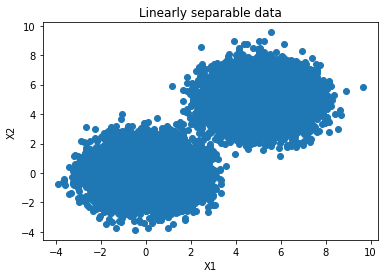

In [60]:
plt.pyplot.scatter(X_train[:,0], X_train[:,1])
plt.pyplot.title('Linearly separable data')
plt.pyplot.xlabel('X1')
plt.pyplot.ylabel('X2')
plt.pyplot.show()

In [61]:
from sklearn import svm 
from sklearn.metrics import plot_confusion_matrix

In [62]:
clf=svm.SVC(kernel='linear')

In [63]:
clf=clf.fit(X_train,y_train)

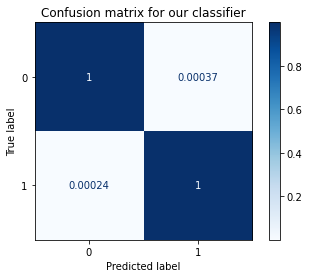

In [64]:
predictions = clf.predict(X_test)

# Generate confusion matrix
matrix = plot_confusion_matrix(clf, X_test, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize='true')
plt.pyplot.title('Confusion matrix for our classifier')
plt.pyplot.show(matrix)
plt.pyplot.show()

In [65]:
from sklearn.metrics import precision_score, recall_score,f1_score

In [66]:
print(precision_score(y_test, predictions))
print(recall_score(y_test, predictions)) 
print(f1_score(y_test,predictions,average=None))

0.9996342801414116
0.9997561570348695
[0.99969447 0.99969521]


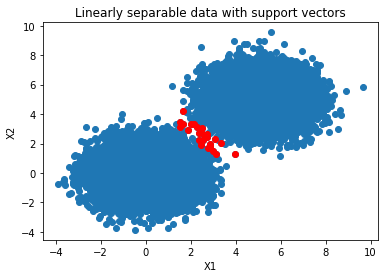

In [67]:
support_vectors = clf.support_vectors_

# Visualize support vectors
plt.pyplot.scatter(X_train[:,0], X_train[:,1])
plt.pyplot.scatter(support_vectors[:,0], support_vectors[:,1], color='red')
plt.pyplot.title('Linearly separable data with support vectors')
plt.pyplot.xlabel('X1')
plt.pyplot.ylabel('X2')
plt.pyplot.show()

In [68]:
from mlxtend.plotting import plot_decision_regions

TypeError: axis() got an unexpected keyword argument 'y_min'

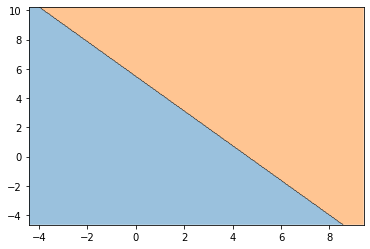

In [70]:
plot_decision_regions(X_test, y_test, clf=clf, legend=2)

In [73]:
plt.pyplot.show()

In [74]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn import datasets
import numpy as np

TypeError: axis() got an unexpected keyword argument 'y_min'

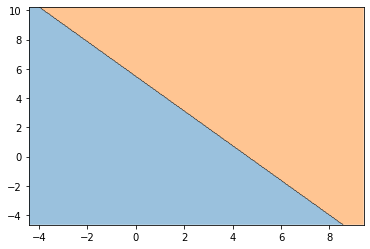

In [75]:
plot_decision_regions(X_test, y_test, clf=clf, legend=2)
plt.pyplot.show()